In [387]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [237]:
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()

## Veri setinin hikayesi 

In [238]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [239]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Veri setinin yapısal bilgileri

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [241]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## object verileri Categoricala çeviriyorum

In [242]:
df.sex = pd.Categorical(df.sex)
df.smoker = pd.Categorical(df.smoker)
df.region = pd.Categorical(df.region)

In [243]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [244]:
df.shape

(1338, 7)

In [245]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [246]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## hiç eksik gözlem(değer) var mı 

In [247]:
df.isnull().values.any()

False

In [248]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Sadece Kategorik Değişkenler ve Özetleri

In [249]:
kat_df = df.select_dtypes(include = ["category"])
kat_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


## Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek

In [252]:
kat_df.sex.unique()

['female', 'male']
Categories (2, object): ['female', 'male']

In [251]:
kat_df.smoker.unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [253]:
kat_df.region.unique()

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

## Kategorik Değişkenin Sınıflarının Frekanslarına erişmek

In [254]:
kat_df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [166]:
kat_df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [255]:
kat_df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:>

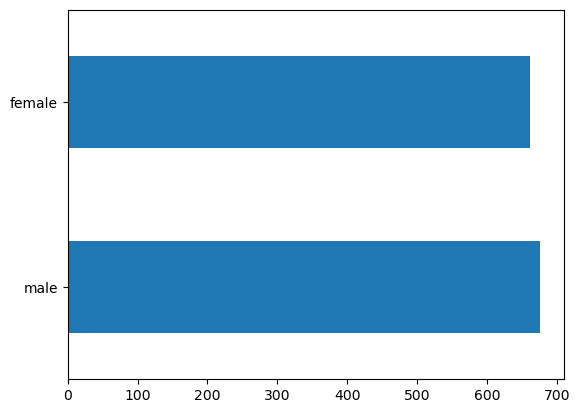

In [168]:
df["sex"].value_counts().plot.barh()

<AxesSubplot:>

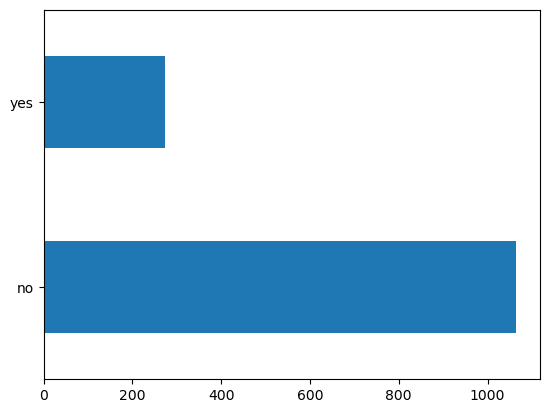

In [256]:
df["smoker"].value_counts().plot.barh()

<AxesSubplot:>

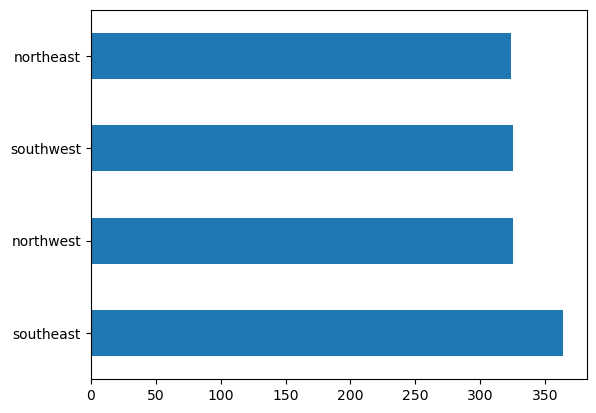

In [169]:
df["region"].value_counts().plot.barh()

## (Body Mass Index) inceleme

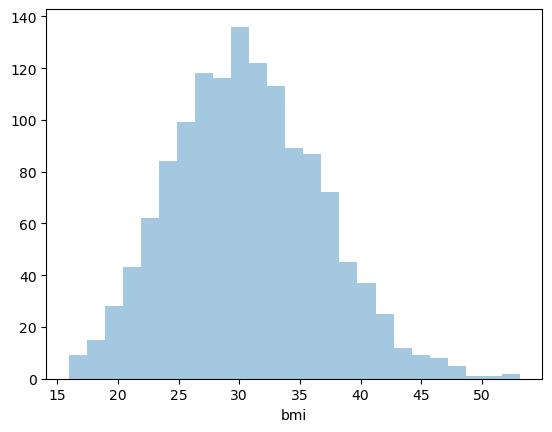

In [258]:
sns.distplot(df.bmi , kde = False);

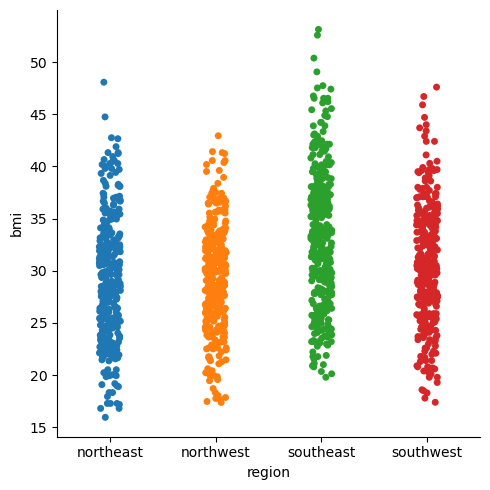

In [259]:
# güneydoğuda yaşayanlar kitle indexi biraz daha oldğu görülüyor
sns.catplot( x = "region" ,y = "bmi" , data = df);


## Sigara içen” ile “suçlamalar” arasındaki ilişkinin incelemesi

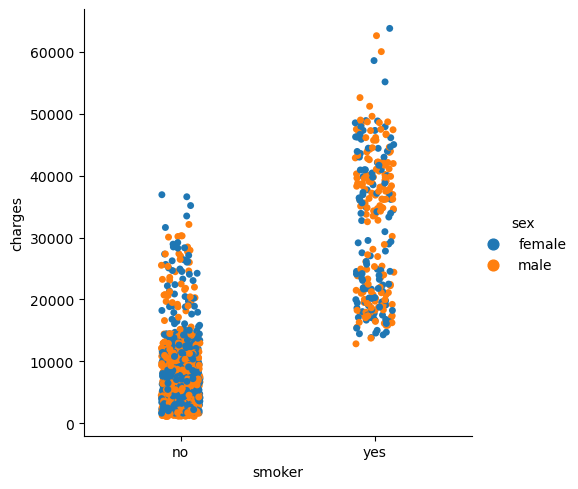

In [260]:
sns.catplot(x = "smoker", y = "charges" , hue = "sex" ,  data = df);

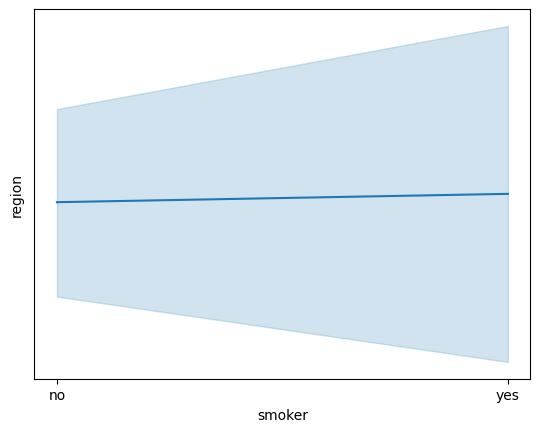

In [261]:
sns.lineplot(x = "smoker" , y = "region" , data = df);

## bmi ile sex arasındaki ilişkiyi inceleme

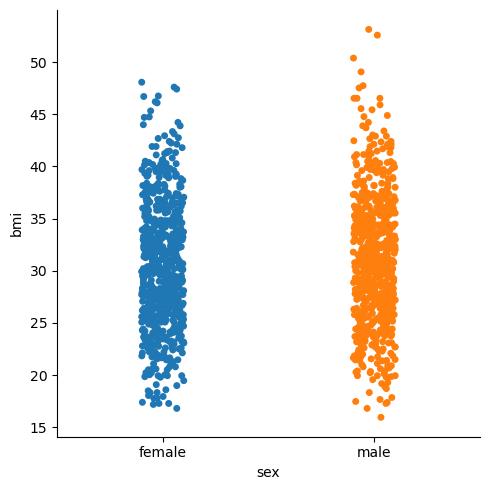

In [262]:
# kütle indexi erkeklerde ortalamalrdan biraz daha sapabiliyor
sns.catplot( x = "sex" ,y = "bmi" , data = df);


## en çok  çoçuk iceren bölgeyi inceleme

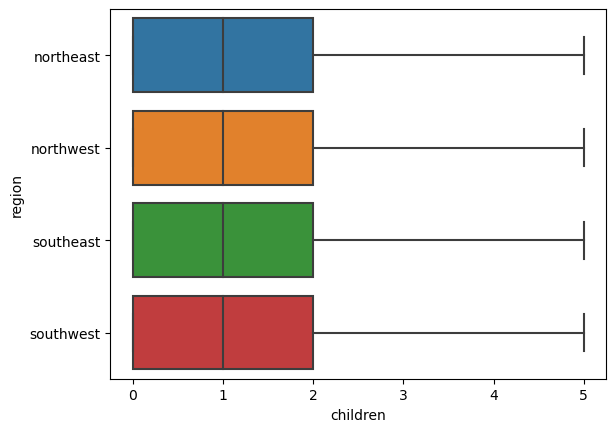

In [263]:
## her bölgede eşit sayıda çoçuk olduğu görülmekde
sns.boxplot(x = "children" , y = "region" , data = df);

## Yaş ile vucut kitle indexi arasındaki ilişki


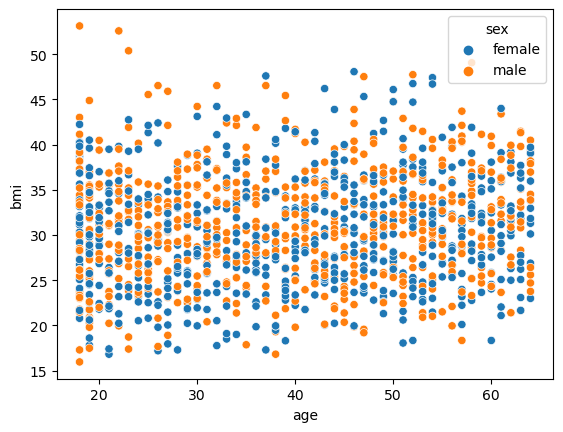

In [264]:
sns.scatterplot(x = "age" , y = "bmi" , hue = "sex" , data = df);

## Vucut kitle indexi ve çouk arasındakı  ılıskıyı ınceleme

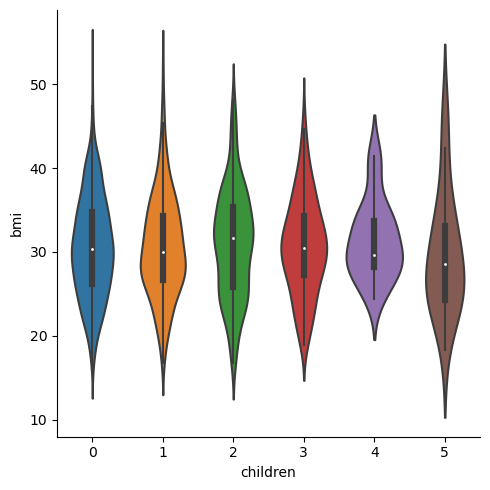

In [265]:
sns.catplot(x = "children" , y = "bmi" , kind = "violin", data = df);

## Bmi aykırı veri analizi 

<AxesSubplot:>

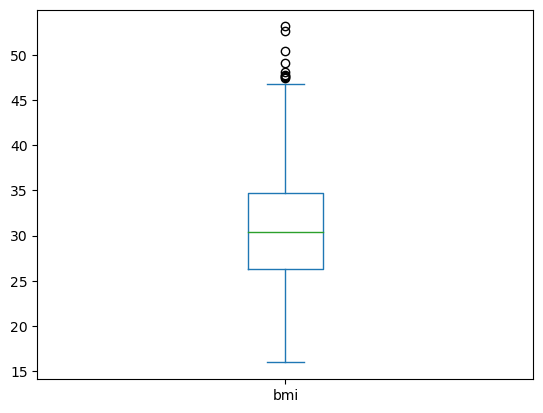

In [267]:
# Ayıkırı değer olduğu gözükmekde
df["bmi"].plot(kind='box')

In [268]:
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
IQR = Q3 - Q1 

In [269]:
Q1 , Q3 , IQR

(26.29625, 34.69375, 8.3975)

In [270]:
Q3 + 1.5*IQR

47.290000000000006

In [271]:
Q1 - 1.5*IQR 

13.7

## Bmi ile charges arasındaki ilişkiyi inceleme

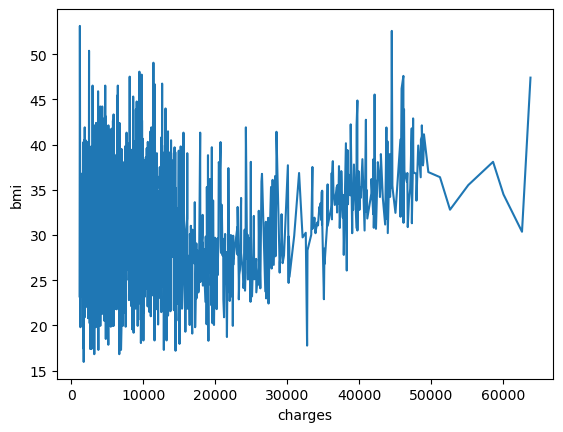

In [272]:
# 0-10000  arasında kümeleşme olduğu görülmekte
# 
sns.lineplot(x = "charges" , y = "bmi" ,  data = df);

## Barplot kullanarak region smoker ve bmi ilşkisini inceleme

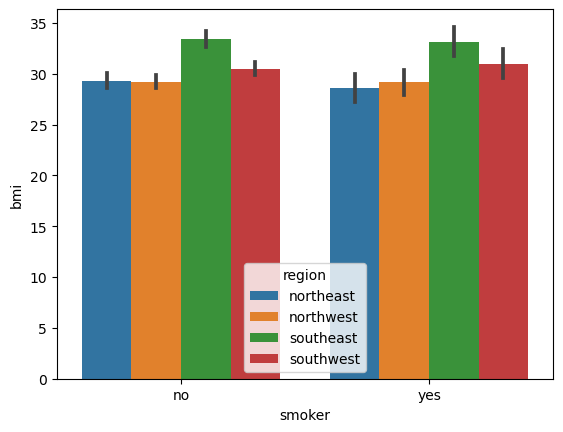

In [273]:
# vucut kitle indexsi ve bölgelerde sigara içme oranlarında anlamlı bir değişiklik yok
sns.barplot( x = "smoker" , y = "bmi" , hue = "region" , data = df);

## korelasyon inceleme

In [274]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


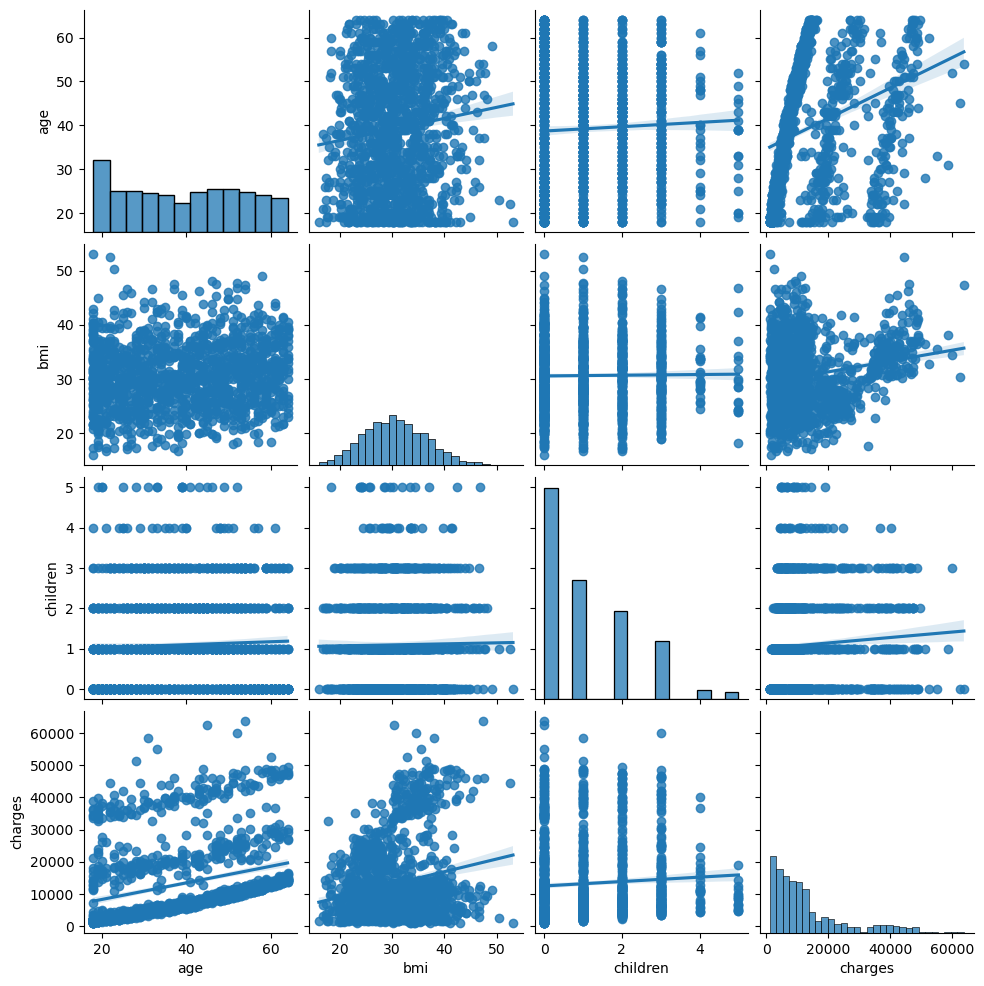

In [276]:
sns.pairplot(df, kind = "reg");

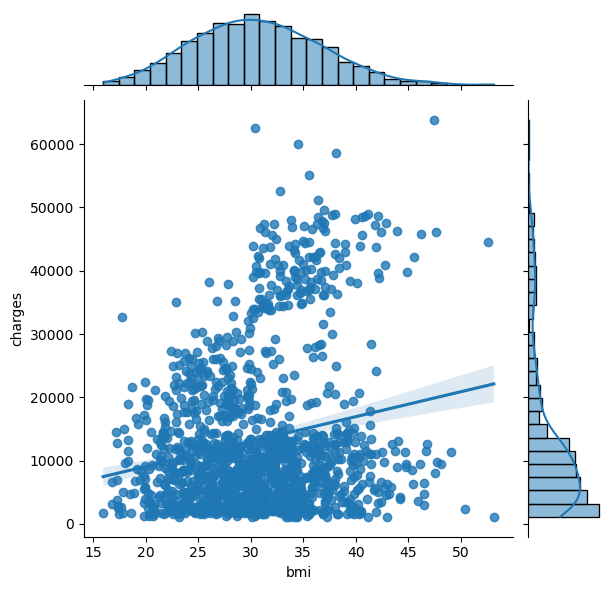

In [275]:
sns.jointplot(x = "bmi" , y = "charges" , data = df , kind = "reg");

In [277]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Statsmodels ile modelleme 

In [278]:
X = df[["bmi"]]
X[0:5]
        

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880


In [279]:
X = sm.add_constant(X)

In [280]:
X[0:5]

,const,bmi
0,1.0,27.900
1,1.0,33.770
2,1.0,33.000
3,1.0,22.705
4,1.0,28.880


In [281]:
y = df["charges"]
y[0:5]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [282]:
lm = sm.OLS(y,X)

In [284]:
model = lm.fit()

In [285]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           2.46e-13
Time:                        22:11:41   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1192.9372   1664.802      0.717      0.474   -2072.974    4458.849
bmi          393.8730     53.251      7.397      0.000     289.409     498.337
==============================================================================
Omnibus:                      261.030   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.091
Skew:                           1.297   Prob(JB):                     2.45e-94
Kurtosis:                       4.004   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
model.params

const    1192.937209
bmi       393.873031
dtype: float64

In [287]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,1192.9372,1664.802,0.717,0.474,-2072.974,4458.849
bmi,393.8730,53.251,7.397,0.000,289.409,498.337


In [289]:
model.conf_int()

,0,1
const,-2072.974250,4458.848668
bmi,289.408862,498.337199


In [290]:
model.f_pvalue

2.459085535118864e-13

In [291]:
print("f_pvalue: " , "%.3f" % model.f_pvalue)

f_pvalue:  0.000


In [292]:
print("fvalue: " , "%.3f" % model.fvalue)

fvalue:  54.709


In [293]:
print("tvalue: " , "%.3f" % model.tvalues[0:1])

tvalue:  0.717


In [294]:
model.mse_model

7713391236.563995

In [295]:
model.rsquared_adj

0.03862008238786108

In [296]:
model.fittedvalues[0:5]

0    12181.994768
1    14494.029459
2    14190.747225
3    10135.824373
4    12567.990338
dtype: float64

## bağımsız değişkenin bağımlı değişkenin değişkenini % 0.03 acıklama başarı vardır

## Model anlamlıdır

# LinearRegression ile tahmin üretmek

## Tahmin

In [297]:
X = df[["bmi"]]
y = df["charges"]
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_
model.coef_
       

array([393.8730308])

In [298]:
model.score(X,y)

0.03933913991786253

In [299]:
model.predict(X)[0:10]

array([12181.99476821, 14494.02945899, 14190.74722528, 10135.82437322,
       12567.99033839, 11331.22902169, 14364.05135883, 12118.97508328,
       12942.16971765, 11370.61632477])

## Artıklar

In [300]:
lm = smf.ols ("bmi ~ charges", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           2.46e-13
Time:                        22:12:15   Log-Likelihood:                -4290.3
No. Observations:                1338   AIC:                             8585.
Df Residuals:                    1336   BIC:                             8595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.3380      0.243    120.956      0.000      28.862      29.814
charges     9.988e-05   1.35e-05      7.397      0.000    7.34e-05       0.000
==============================================================================
Omnibus:                       24.788   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.774
Skew:                           0.339   Prob(JB):                     2.53e-06
Kurtosis:                       3.048   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## tahmin eden değerler ile gercek değerler arasındakı farkların karelerının ortalması

In [301]:
from sklearn.metrics import mean_squared_error
lm = smf.ols("bmi ~ charges",df)
model = lm.fit()

In [302]:
mse = mean_squared_error(y, model.fittedvalues)

In [303]:
mse

321804710.1310738

In [304]:
rmse = np.sqrt(mse)

In [305]:
rmse

17938.916080161416

In [306]:
reg.predict(X)[0:10]

array([12181.99476821, 14494.02945899, 14190.74722528, 10135.82437322,
       12567.99033839, 11331.22902169, 14364.05135883, 12118.97508328,
       12942.16971765, 11370.61632477])

In [307]:
k_t = pd.DataFrame({"gercek_y":  y[0:10],
                    "tahmin_y": reg.predict(X)[0:10]})

In [308]:
k_t

,gercek_y,tahmin_y
0,16884.92400,12181.994768
1,1725.55230,14494.029459
2,4449.46200,14190.747225
3,21984.47061,10135.824373
4,3866.85520,12567.990338
5,3756.62160,11331.229022
6,8240.58960,14364.051359
7,7281.50560,12118.975083
8,6406.41070,12942.169718
9,28923.13692,11370.616325


In [309]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [310]:
k_t

,gercek_y,tahmin_y,hata
0,16884.92400,12181.994768,4702.929232
1,1725.55230,14494.029459,-12768.477159
2,4449.46200,14190.747225,-9741.285225
3,21984.47061,10135.824373,11848.646237
4,3866.85520,12567.990338,-8701.135138
5,3756.62160,11331.229022,-7574.607422
6,8240.58960,14364.051359,-6123.461759
7,7281.50560,12118.975083,-4837.469483
8,6406.41070,12942.169718,-6535.759018
9,28923.13692,11370.616325,17552.520595


In [311]:
k_t["hata_kare"] = k_t["hata"]**2

In [312]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,16884.92400,12181.994768,4702.929232,2.211754e+07
1,1725.55230,14494.029459,-12768.477159,1.630340e+08
2,4449.46200,14190.747225,-9741.285225,9.489264e+07
3,21984.47061,10135.824373,11848.646237,1.403904e+08
4,3866.85520,12567.990338,-8701.135138,7.570975e+07
5,3756.62160,11331.229022,-7574.607422,5.737468e+07
6,8240.58960,14364.051359,-6123.461759,3.749678e+07
7,7281.50560,12118.975083,-4837.469483,2.340111e+07
8,6406.41070,12942.169718,-6535.759018,4.271615e+07
9,28923.13692,11370.616325,17552.520595,3.080910e+08


In [313]:
np.sum(k_t["hata_kare"])

965224058.1890321

In [314]:
np.mean(k_t["hata_kare"])

96522405.81890321

In [315]:
np.sqrt(np.mean(k_t["hata_kare"]))

9824.58171215972

In [316]:
model.resid[0:10]

0   -3.124405
1    4.259678
2    3.217621
3   -8.828736
4   -0.844190
5   -3.973180
6    3.278971
7   -2.325238
8   -0.147835
9   -6.386754
dtype: float64

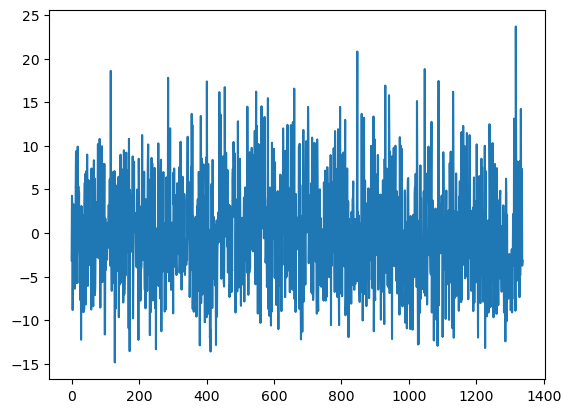

In [319]:
plt.plot(model.resid)

# PCR MODEL

In [331]:
dms = pd.get_dummies(df[['sex','smoker','region']])
dms.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [332]:
y = df["charges"]

In [338]:
X_ = df.drop(["charges", "sex","smoker","region"], axis = 1).astype("float64")

In [339]:
X_.head()

,age,bmi,children
0,19.0,27.900,0.0
1,18.0,33.770,1.0
2,28.0,33.000,3.0
3,33.0,22.705,0.0
4,32.0,28.880,0.0


In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (1003, 1)
y_train (1003,)
X_test (335, 1)
y_test (335,)
training (1338, 7)


In [350]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [351]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [352]:
lm = LinearRegression()

In [353]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [354]:
pcr_model.intercept_

13267.935817337988

In [355]:
pcr_model.coef_

array([2358.82016321])

# Tahmin

In [357]:
y_pred = pcr_model.predict(X_reduced_train)

In [358]:
y_pred[0:5]

array([10576.81790073, 11697.33540775, 16874.0870426 , 15453.32579028,
       12635.35181467])

In [359]:
np.sqrt(mean_squared_error(y_train, y_pred))

11812.12771928287

In [360]:
df["charges"].mean()

13270.422265141257

In [361]:
r2_score(y_train , y_pred)

0.03834873154532481

In [362]:
pca2 = PCA()

In [363]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [364]:
y_pred = pcr_model.predict(X_reduced_test)

In [365]:
np.sqrt(mean_squared_error(y_test, y_pred))

12021.391863824427

# PLS Model

In [371]:
pls_model = PLSRegression().fit(X_train, y_train)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(


In [372]:
pls_model.coef_

array([[2359.99692565]])

## Tahmin

In [373]:
X_train.head()

,bmi
693,23.655
1297,26.510
634,39.700
1022,36.080
178,28.900


In [374]:
pls_model.predict(X_train)[0:10]

array([[10576.81790073],
       [11697.33540775],
       [16874.0870426 ],
       [15453.32579028],
       [12635.35181467],
       [11583.51751737],
       [ 9122.69623226],
       [11620.80268835],
       [11811.15329813],
       [13112.20952781]])

In [375]:
y_pred = pls_model.predict(X_train)

In [376]:
np.sqrt(mean_squared_error(y_train, y_pred))

11812.12771928287

In [377]:
r2_score(y_train, y_pred)

0.03834873154532481

In [378]:
y_pred = pls_model.predict(X_test)

In [379]:
np.sqrt(mean_squared_error(y_test, y_pred))

12022.409082813892

## Ridge Regresyon

In [381]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [382]:
ridge_model

Ridge(alpha=0.1)

In [383]:
10**np.linspace(10,-2,100)*0.5

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

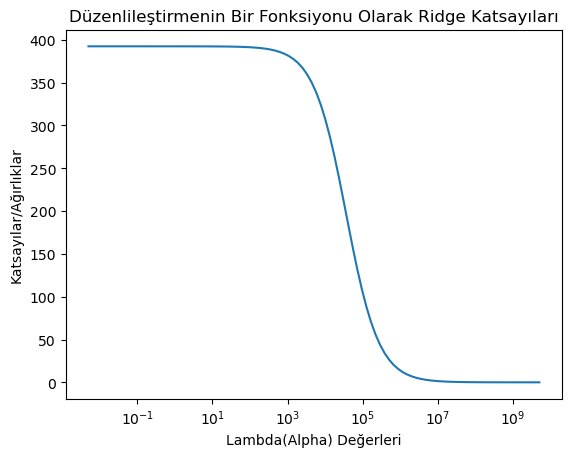

In [384]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

##  Tahmin 

In [385]:
y_pred  = ridge_model.predict(X_test)

In [386]:
np.sqrt(mean_squared_error(y_test, y_pred))

12022.409083592833

## Lasso Model

In [388]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [389]:
lasso_model

Lasso(alpha=0.1)

In [390]:
lasso_model.coef_

array([392.47271563])

Text(0, 0.5, 'weights')

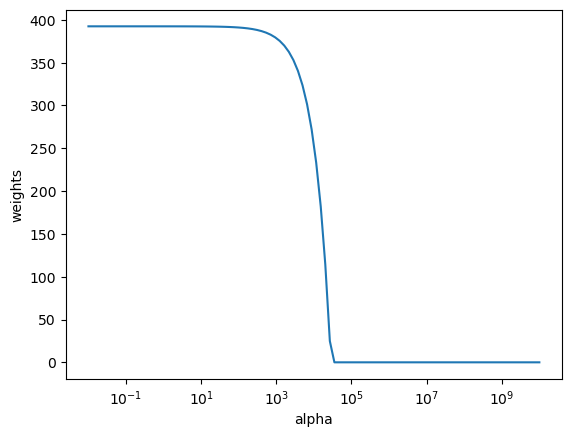

In [391]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Tahmin

In [392]:
lasso_model.predict(X_test)

array([11173.39541108, 13074.92571829, 11844.5237548 , 11397.10485899,
       13820.62387798, 18129.97429555, 10129.41798752, 16169.573081  ,
        8078.74804837, 12552.93700651, 10869.22905647, 13298.6351662 ,
       12906.16245057, 17914.11430196, 17352.87831861, 16575.78234167,
       18043.63029811, 15669.17036858, 12301.75446851, 11844.5237548 ,
       10672.99269866, 14087.5053246 , 13224.06535023, 16915.27124069,
       12329.2275586 , 14118.90314185, 15068.68711367, 13224.06535023,
       11732.66903085, 13122.02244416, 12792.34536304, 13783.33896999,
       14978.41838908,  9122.72547194, 13067.07626398, 16915.27124069,
       11654.17448772, 13027.82899241, 10763.26142325, 15107.93438523,
       12517.6144621 , 13596.91443007, 15343.41801461, 11285.25013503,
       15323.79437883, 12085.89447491, 14491.7522217 , 10829.98178491,
       15410.13837626, 16359.92234808, 15539.65437242, 12819.81845313,
       17549.11467643, 11546.24449093, 14805.7303942 , 13895.19369395,
      

In [393]:
y_pred = lasso_model.predict(X_test)

In [394]:
np.sqrt(mean_squared_error(y_test, y_pred))

12022.409122639385

# En iyi performans lasso modelde de görüldü 